In [1]:
from dotenv import load_dotenv
import os

load_dotenv()

True

In [2]:
from typing import Annotated, TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain_ollama import ChatOllama

In [3]:
base_url = "http://localhost:11434/"
model = "llama3.2:1b"
# model = "model"

llm = ChatOllama(
    base_url = base_url,
    model = model,
    # temperature = 0.6,
    # num_predict = 700,
)

In [4]:
def run_llm(message):
    i = 0
    for chunk in llm.stream(message):
        # response += response +" "+ chunk.content
        i += 1
        word_wrap = 10

        if i % word_wrap != 0:
            print(f"{chunk.content}", end="")
        else:
            print(f"{chunk.content}")

In [5]:
run_llm("Hi")

How can I help you today?

In [6]:
class State(TypedDict):
    messages: Annotated[list, add_messages]


def chatbot(state: State):
    response = llm.invoke(state['messages'])
    return {"messages": [response]}


graph_builder = StateGraph(State)
graph_builder.add_node("chatbot", chatbot)

graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

graph = graph_builder.compile()

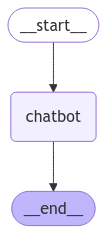

In [7]:
# from IPython.display import display, Image

# display(Image(graph.get_graph().draw_mermaid_png()))

graph

In [8]:
graph.invoke({"messages": ["Hi", "I am None"]})

{'messages': [HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}, id='21f79f9d-f2ac-4406-9783-310b2a8d6ac8'),
  HumanMessage(content='I am None', additional_kwargs={}, response_metadata={}, id='168f7633-e3f1-4393-9858-657377e1d300'),
  AIMessage(content='Hello. How can I assist you today?', additional_kwargs={}, response_metadata={'model': 'llama3.2:1b', 'created_at': '2025-03-14T22:32:39.805989242Z', 'done': True, 'done_reason': 'stop', 'total_duration': 314487206, 'load_duration': 34649704, 'prompt_eval_count': 30, 'prompt_eval_duration': 27000000, 'eval_count': 10, 'eval_duration': 250000000, 'message': Message(role='assistant', content='', images=None, tool_calls=None)}, id='run-a13eabbd-bcc9-4638-a911-ad3f3992fcd3-0', usage_metadata={'input_tokens': 30, 'output_tokens': 10, 'total_tokens': 40})]}

In [10]:
while True:
    user_input = input("You: ")
    if user_input in ['q', 'quit', 'exit']:
        print("Bye!")

    response = graph.invoke({"messages": [user_input]})
    print("Assistant:", response["messages"][-1].content)

Assistant: How can I help you today?


KeyboardInterrupt: 